In [1]:
import pandas as pd
import numpy as np

In [2]:
vdf = pd.read_csv('평일노드간통행속도.csv')
vdf.head()

,출발노드주소,도착노드주소,평균속도
0,부산광역시,부산광역시,73
1,부산광역시,부산광역시,86
2,부산광역시,경상남도,92
3,경상남도,경상남도,87
4,경상남도,울산광역시,90


In [3]:
vdf = vdf.sort_values(by=['출발노드주소','도착노드주소'], ignore_index=True)
vdf.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,강원도,98
1,강원도,강원도,99
2,강원도,강원도,95
3,강원도,강원도,102
4,강원도,강원도,98


In [4]:
gvdf = vdf.groupby(['출발노드주소','도착노드주소']).mean()
gvdf.head()

평균속도
출발노드주소 도착노드주소            
강원도    강원도     100.597561
       경기도      99.600000
       충청북도     92.000000
경기도    강원도      98.800000
       경기도      83.249097

In [5]:
gvdf['평균속도'] = gvdf['평균속도'].apply(lambda x:round(x,3))
gvdf

평균속도
출발노드주소 도착노드주소         
강원도    강원도     100.598
       경기도      99.600
       충청북도     92.000
경기도    강원도      98.800
       경기도      83.249
...                ...
충청북도   경기도      94.333
       경상북도     95.250
       대전광역시    96.500
       충청남도     93.000
       충청북도     94.961

[84 rows x 1 columns]

In [6]:
gvdf = gvdf.reset_index()
gvdf.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,강원도,100.598
1,강원도,경기도,99.600
2,강원도,충청북도,92.000
3,경기도,강원도,98.800
4,경기도,경기도,83.249


In [7]:
# drop self-loops
dropIdx = gvdf[gvdf['출발노드주소']==gvdf['도착노드주소']].index
gvdf = gvdf.drop(dropIdx)
gvdf.shape

(68, 3)

In [8]:
gvdf.to_csv('평일전국평균속도그룹집계.csv')

In [20]:
gvdf = pd.read_excel('평일전국평균속도그룹집계Encoded.xlsx')
gvdf.head()

,출발노드주소,도착노드주소,평균속도
0,강원도,경기도,99.600
1,강원도,충청북도,92.000
2,경기도,강원도,98.800
3,경기도,서울특별시,65.741
4,경기도,인천광역시,95.800


In [10]:
nodeListTemp = np.concatenate((gvdf['출발노드주소'].values, gvdf['도착노드주소'].values), axis=None)
nodeListTemp = np.unique(nodeListTemp)
len(nodeListTemp)

16

In [11]:
nodeListTemp

array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '충청남도',
       '충청북도'], dtype=object)

In [12]:
edgeZip = zip(gvdf['출발노드주소'],gvdf['도착노드주소'])
edgeList = list(edgeZip)

In [13]:
print("min : ",np.min(gvdf['평균속도']))
print("max : ",np.max(gvdf['평균속도']))

min :  65.741
max :  105.0


In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
fm.fontManager.addfont('BinggraeII.ttf')

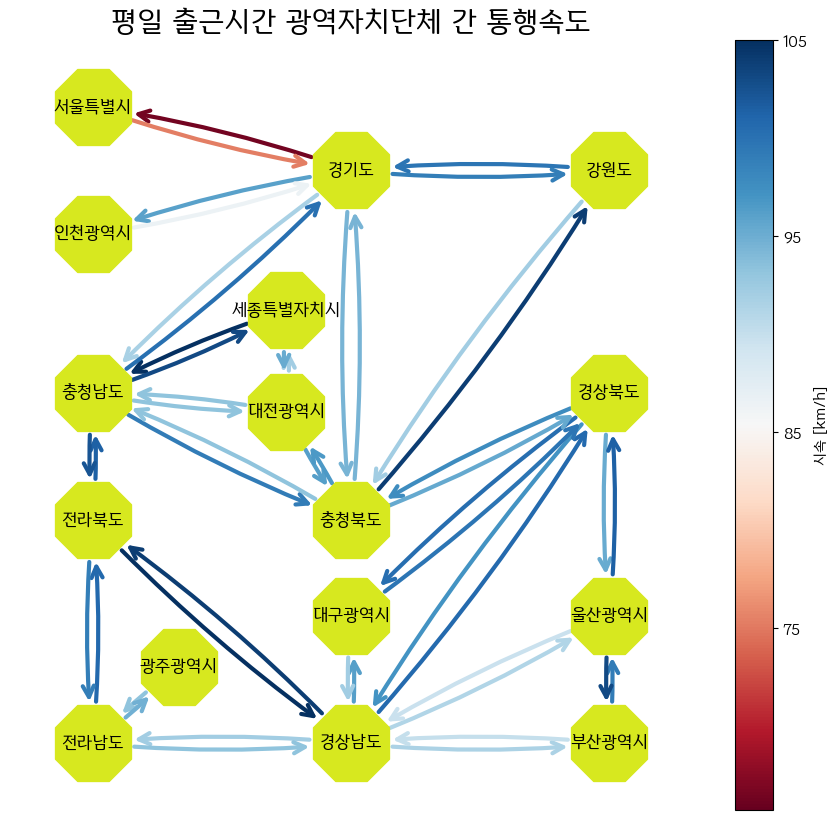

In [16]:
fig, ax = plt.subplots(1,1,figsize=(11,10))
G = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.RdBu
G.add_nodes_from(nodeListTemp)
# pos = nx.circular_layout(G)
pos = {'강원도':(600,1000), '경기도':(300,1000), '경상남도':(300,100), '경상북도':(600,650),
       '광주광역시':(100,220),'대구광역시':(300,300),'대전광역시':(225,620), '부산광역시':(600,100), 
       '서울특별시':(0,1100),'세종특별자치시':(225,780),'울산광역시':(600,300), '인천광역시':(0,900), 
       '전라남도':(0,100), '전라북도':(0,450),'충청남도':(0,650),'충청북도':(300,450)}
nodes = nx.draw_networkx_nodes(G, pos, node_size=3500, node_color='#d7e81f', node_shape='8') #alpha=0.5
nx.draw_networkx_labels(G,pos,labels={i:i for i in nodeListTemp},font_family='Binggrae?') #font_color='white'
edges = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=edgeList,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3, rad=0.05', # rad=0.1
    arrowsize=20,
    width=3,
    # edge_color=list(edge_colors),
    edge_color=gvdf['평균속도'].values,
    edge_vmin=65,
    edge_vmax=105,
    edge_cmap=cmap,
    min_target_margin=30,
    min_source_margin=30
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(gvdf['평균속도'].values)
plt.margins(0.1,0.05)
ax = plt.gca()
ax.set_axis_off()
ticks = np.linspace(65,105,5)
plt.colorbar(pc, ax=ax, label='시속 [km/h]', ticks=ticks)
plt.title('평일 출근시간 광역자치단체 간 통행속도', fontsize=20)
plt.show()

In [17]:
fig.savefig('평일출근시간권역별통행속도다시.png')

In [ ]:
# do the same with traffic


In [21]:
# take a close look at 경남
idf = gvdf.copy()
idf = idf[(idf['출발노드주소']=='경상남도')|(idf['도착노드주소']=='경상남도')]
idf.head()

,출발노드주소,도착노드주소,평균속도
7,경상남도,경상북도,100.5
8,경상남도,대구광역시,96.0
9,경상남도,부산광역시,91.4
10,경상남도,울산광역시,91.0
11,경상남도,전라남도,92.0


In [23]:
idf.sort_values('평균속도')

,출발노드주소,도착노드주소,평균속도
28,울산광역시,경상남도,89.5
23,부산광역시,경상남도,89.8
10,경상남도,울산광역시,91.0
9,경상남도,부산광역시,91.4
18,대구광역시,경상남도,92.0
11,경상남도,전라남도,92.0
32,전라남도,경상남도,93.0
8,경상남도,대구광역시,96.0
13,경상북도,경상남도,97.0
7,경상남도,경상북도,100.5


In [132]:
nodeListTemp2 = np.concatenate((idf['출발노드주소'].values, idf['도착노드주소'].values), axis=None)
nodeListTemp2 = np.unique(nodeListTemp2)
len(nodeListTemp2)

7

In [135]:
nodeListTemp2

array(['경상남도', '경상북도', '대구광역시', '부산광역시', '울산광역시', '전라남도', '전라북도'],
      dtype=object)

In [133]:
edgeZip2 = zip(idf['출발노드주소'],idf['도착노드주소'])
edgeList2 = list(edgeZip2)

In [134]:
print("min : ",np.min(idf['평균속도']))
print("max : ",np.max(idf['평균속도']))

min :  89.5
max :  105.0


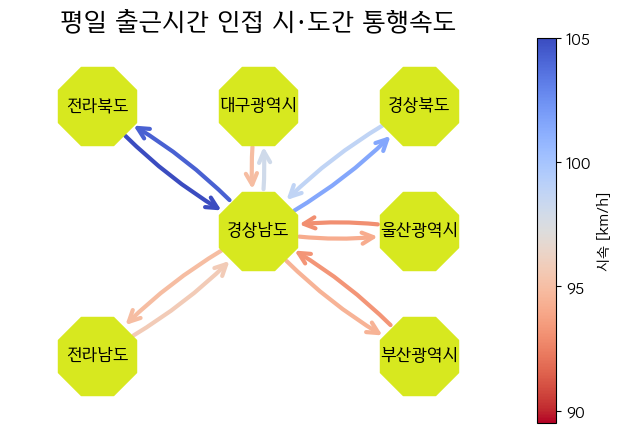

In [147]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
F = nx.Graph()
mpl.rcParams["font.family"] = 'Binggrae?'
cmap = plt.cm.coolwarm.reversed()
F.add_nodes_from(nodeListTemp2)
# pos = nx.circular_layout(G)
pos = {'경상남도':(300,300),'경상북도':(600,600),'대구광역시':(300,600),'부산광역시':(600,0), 
       '울산광역시':(600,300),'전라남도':(0,0),'전라북도':(0,600)}
nodes = nx.draw_networkx_nodes(F, pos, node_size=3700, node_color='#d7e81f', node_shape='8') #alpha=0.5
nx.draw_networkx_labels(F,pos,labels={i:i for i in nodeListTemp2},font_family='Binggrae?') #font_color='white'
edges = nx.draw_networkx_edges(
    F,
    pos,
    edgelist=edgeList2,
    arrows=True,
    arrowstyle="->",
    connectionstyle='arc3, rad=0.1', # rad=0.1
    arrowsize=20,
    width=3,
    # edge_color=list(edge_colors),
    edge_color=idf['평균속도'].values,
    edge_vmin=85,
    edge_vmax=105,
    edge_cmap=cmap,
    min_target_margin=30,
    min_source_margin=30
)

pc = mpl.collections.PatchCollection(edges, cmap=cmap)
pc.set_array(idf['평균속도'].values)
plt.margins(0.2,0.2)
ax = plt.gca()
ax.set_axis_off()
ticks = np.linspace(85,105,5)
plt.colorbar(pc, ax=ax, label='시속 [km/h]', ticks=ticks)
plt.title('평일 출근시간 인접 시·도간 통행속도', fontsize=18)
plt.show()

In [148]:
fig.savefig('평일출근시간인접시도간통행속도.png')

In [2]:
# nationwide traffic network
# tf.to_csv('평일전국통행량수정.csv',encoding='utf-8')
tf = pd.read_csv('평일전국통행량수정.csv')
tf.head()

,Unnamed: 0,name,totalTraffic
0,0,강원도,87857
1,1,경인·서울,473501
2,2,경상남도,351389
3,3,경상북도,340267
4,4,광주광역시,98774
